In [ ]:
# import os 
# os.chdir(r"D:\Python_book\5Preprocessing")

In [2]:
import pandas as pd

# 发现数据问题类型
camp = pd.read_csv('./teleco_camp_orig.csv')
camp.head()

,ID,Suc_flag,ARPU,PromCnt12,PromCnt36,PromCntMsg12,PromCntMsg36,Class,Age,Gender,HomeOwner,AvgARPU,AvgHomeValue,AvgIncome
0,12,1,50.0,6,10,2,3,4,57.0,M,H,49.894904,33400,39460
1,53,0,NaN,5,9,1,4,3,55.0,M,H,48.574742,37600,33545
2,67,1,25.0,6,11,2,4,1,57.0,F,H,49.272646,100400,42091
3,71,1,80.0,7,10,2,4,1,52.0,F,H,47.334953,39900,39313
4,142,1,15.0,6,11,2,4,1,NaN,F,U,47.827404,47500,0


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


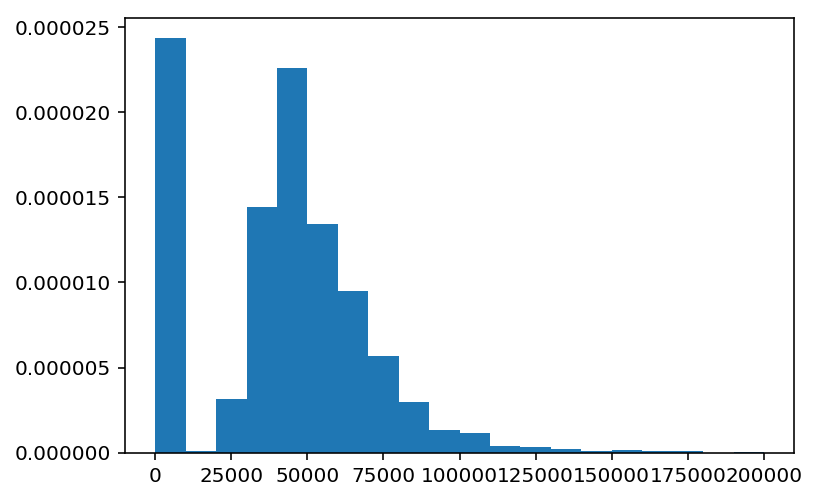

In [4]:
import matplotlib.pyplot as plt

plt.hist(camp['AvgIncome'], bins=20, normed=True)  #查看分布情况
plt.show()

In [5]:
camp['AvgIncome'].describe(include='all')

count      9686.000000
mean      40491.444249
std       28707.494146
min           0.000000
25%       24464.000000
50%       43100.000000
75%       56876.000000
max      200001.000000
Name: AvgIncome, dtype: float64

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([1.41097116e-06, 9.76323216e-06, 8.81340767e-06, 4.28109299e-06,
        2.32294033e-06, 1.53141992e-06, 1.11156996e-06, 1.01176956e-06,
        6.29774933e-07, 4.43939707e-07, 3.75111845e-07, 4.19849955e-07,
        2.30573336e-07, 1.92718012e-07, 1.44538509e-07, 1.23890151e-07,
        1.03241792e-07, 8.94762200e-08, 1.06683185e-07, 2.27131943e-07]),
 array([     0.,  30000.,  60000.,  90000., 120000., 150000., 180000.,
        210000., 240000., 270000., 300000., 330000., 360000., 390000.,
        420000., 450000., 480000., 510000., 540000., 570000., 600000.]),
 <a list of 20 Patch objects>)

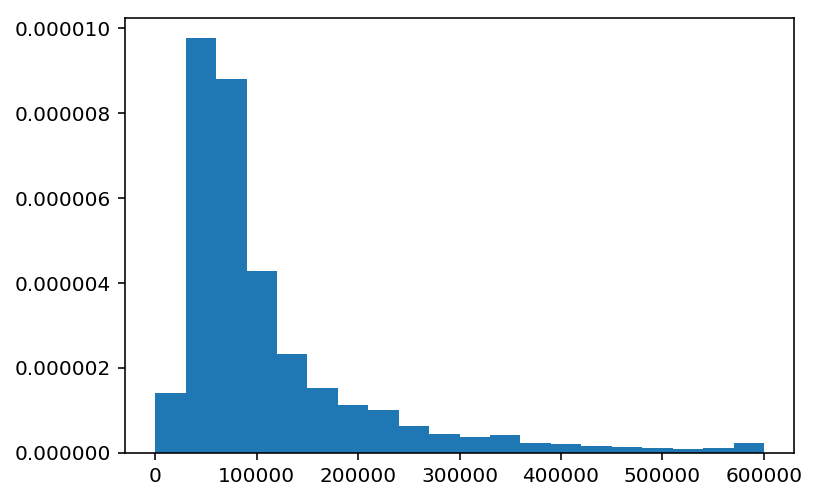

In [6]:
# 脏数据或数据不正确
plt.hist(camp['AvgHomeValue'], bins=20, normed=True)#查看分布情况

In [7]:
camp['AvgHomeValue'].describe(include='all')

count      9686.000000
mean     110986.299814
std       98670.855450
min           0.000000
25%       52300.000000
50%       76900.000000
75%      128175.000000
max      600000.000000
Name: AvgHomeValue, dtype: float64

In [8]:
# 这里的0值应该是缺失值
camp['AvgIncome'] = camp['AvgIncome'].replace({0: np.NaN})

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.38170006e-08, 4.00693017e-07, 6.30055227e-06, 2.41797510e-05,
        2.78550732e-05, 1.62349757e-05, 1.16891825e-05, 6.32818627e-06,
        3.56478615e-06, 1.58895507e-06, 1.50605306e-06, 4.28327018e-07,
        4.55961019e-07, 2.48706011e-07, 6.90850029e-08, 1.79621008e-07,
        9.67190041e-08, 9.67190041e-08, 0.00000000e+00, 2.76340012e-08]),
 array([  2499. ,  12374.1,  22249.2,  32124.3,  41999.4,  51874.5,
         61749.6,  71624.7,  81499.8,  91374.9, 101250. , 111125.1,
        121000.2, 130875.3, 140750.4, 150625.5, 160500.6, 170375.7,
        180250.8, 190125.9, 200001. ]),
 <a list of 20 Patch objects>)

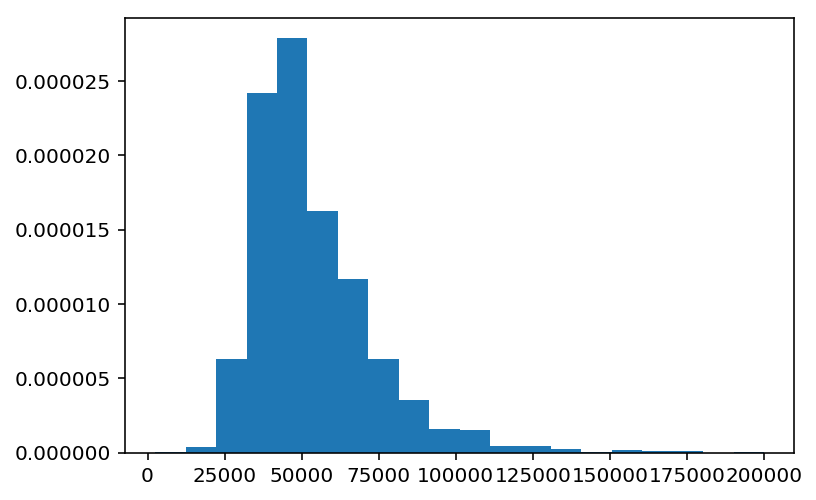

In [9]:
# 像这种外部获取的数据要比较小心，经常出现意义不清晰或这错误值。AvgHomeValue也有这种情况
plt.hist(
    camp['AvgIncome'],
    bins=20,
    normed=True,
    range=(camp.AvgIncome.min(), camp.AvgIncome.max()))  #由于数据中存在缺失值,需要指定绘图的值域

In [10]:
camp['AvgIncome'].describe(include='all')

count      7329.000000
mean      53513.457361
std       19805.168339
min        2499.000000
25%       40389.000000
50%       48699.000000
75%       62385.000000
max      200001.000000
Name: AvgIncome, dtype: float64

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


count      9583.000000
mean     112179.202755
std       98522.888583
min        7500.000000
25%       53200.000000
50%       77700.000000
75%      129350.000000
max      600000.000000
Name: AvgHomeValue, dtype: float64

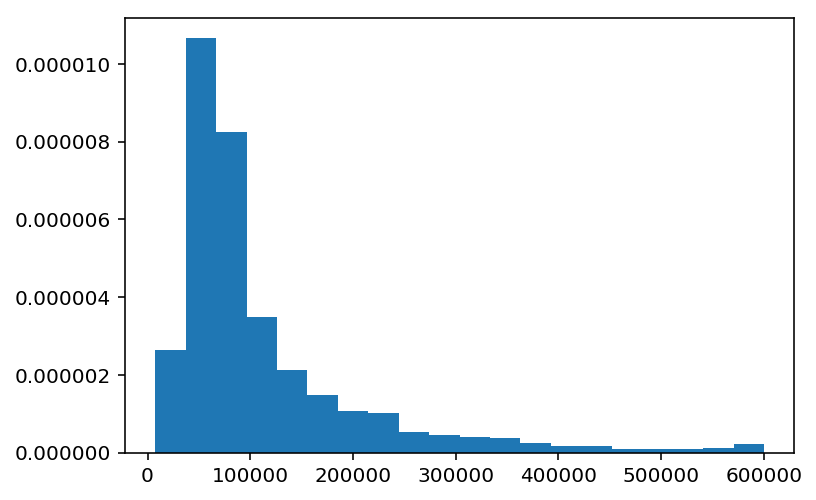

In [11]:
camp['AvgHomeValue'] = camp['AvgHomeValue'].replace({0: np.NaN})
plt.hist(
    camp['AvgHomeValue'],
    bins=20,
    normed=True,
    range=(camp.AvgHomeValue.min(),
           camp.AvgHomeValue.max()))  #由于数据中存在缺失值,需要指定绘图的值域
camp['AvgHomeValue'].describe(include='all')

In [13]:
camp['dup'] = camp.duplicated() # 生成重复标识变量
camp.dup.head()

0    False
1    False
2    False
3    False
4    False
Name: dup, dtype: bool

In [14]:
# 本数据没有重复记录，此处只是示例
camp_dup = camp[camp['dup'] == True] # 把有重复的数据保存出来，以备核查
camp_nodup = camp[camp['dup'] == False] # 注意与 camp.drop_duplicates()的区别
camp_nodup.head()

,ID,Suc_flag,ARPU,PromCnt12,PromCnt36,PromCntMsg12,PromCntMsg36,Class,Age,Gender,HomeOwner,AvgARPU,AvgHomeValue,AvgIncome,dup
0,12,1,50.0,6,10,2,3,4,57.0,M,H,49.894904,33400.0,39460.0,False
1,53,0,NaN,5,9,1,4,3,55.0,M,H,48.574742,37600.0,33545.0,False
2,67,1,25.0,6,11,2,4,1,57.0,F,H,49.272646,100400.0,42091.0,False
3,71,1,80.0,7,10,2,4,1,52.0,F,H,47.334953,39900.0,39313.0,False
4,142,1,15.0,6,11,2,4,1,NaN,F,U,47.827404,47500.0,NaN,False


In [ ]:
camp['dup1'] = camp['ID'].duplicated() # 按照主键进行重复记录标识
# accepts['fico_score'].duplicated() # 没有实际意义

### 如果 count 数量少于样本量，说明存在缺失

In [15]:
# 缺失值处理


camp.describe()

,ID,Suc_flag,ARPU,PromCnt12,PromCnt36,PromCntMsg12,PromCntMsg36,Class,Age,AvgARPU,AvgHomeValue,AvgIncome
count,9686.000000,9686.000000,4843.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,7279.000000,9686.000000,9583.000000,7329.000000
mean,97975.474086,0.500000,78.121722,3.495251,7.466963,1.034586,2.323044,2.424530,49.567386,52.905156,112179.202755,53513.457361
std,56550.171120,0.500026,62.225686,1.270258,1.977909,0.244171,0.904083,1.049047,6.991306,4.993775,98522.888583,19805.168339
min,12.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,1.000000,16.000000,46.138968,7500.000000,2499.000000
25%,48835.500000,0.000000,50.000000,3.000000,6.000000,1.000000,1.000000,2.000000,45.000000,49.760116,53200.000000,40389.000000
50%,99106.000000,0.500000,65.000000,3.000000,8.000000,1.000000,3.000000,2.000000,50.000000,50.876672,77700.000000,48699.000000
75%,148538.750000,1.000000,100.000000,4.000000,8.000000,1.000000,3.000000,3.000000,55.000000,54.452822,129350.000000,62385.000000
max,191779.000000,1.000000,1000.000000,15.000000,20.000000,4.000000,6.000000,4.000000,60.000000,99.444787,600000.000000,200001.000000


可以看出，缺失最多的两个变量是 Age 和 AvgIncome，缺失了大概 $20\%$。

In [16]:
import numpy as np

vmean = camp['Age'].mean(axis=0, skipna=True)
camp['Age_empflag'] = camp['Age'].isnull()
camp['Age'] = camp['Age'].fillna(vmean)
camp['Age'].describe()

count    9686.000000
mean       49.567386
std         6.060585
min        16.000000
25%        47.000000
50%        49.567386
75%        54.000000
max        60.000000
Name: Age, dtype: float64

In [17]:
vmean = camp['AvgHomeValue'].mean(axis=0, skipna=True)
camp['AvgHomeValue_empflag'] = camp['AvgHomeValue'].isnull()
camp['AvgHomeValue'] = camp['AvgHomeValue'].fillna(vmean)
camp['AvgHomeValue'].describe()

count      9686.000000
mean     112179.202755
std       97997.592632
min        7500.000000
25%       53500.000000
50%       78450.000000
75%      128175.000000
max      600000.000000
Name: AvgHomeValue, dtype: float64

In [18]:
vmean = camp['AvgIncome'].mean(axis=0, skipna=True)
camp['AvgIncome_empflag'] = camp['AvgIncome'].isnull()
camp['AvgIncome'] = camp['AvgIncome'].fillna(vmean)
camp['AvgIncome'].describe()

count      9686.000000
mean      53513.457361
std       17227.468161
min        2499.000000
25%       42775.000000
50%       53513.457361
75%       56876.000000
max      200001.000000
Name: AvgIncome, dtype: float64

In [ ]:
# - 其他有缺失变量请自行填补，找到一个有缺失的分类变量，使用众数进行填补
# - 多重插补：sklearn.preprocessing.Imputer 仅可用于填补均值、中位数、众数，多重插补可考虑使用 Orange、impute、Theano 等包
# - 多重插补的处理有两个要点：1、被解释变量有缺失值的观测不能填补，只能删除；2、只对放入模型的解释变量进行插补。

# * 噪声值处理
# - 盖帽法

# In[ ]:

def blk(floor, root): # 'blk' will return a function
    def f(x):       
        if x < floor:
            x = floor
        elif x > root:
            x = root
        return x
    return f

q1 = camp['Age'].quantile(0.01) # 计算百分位数
q99 = camp['Age'].quantile(0.99)
blk_tot = blk(floor=q1, root=q99) # 'blk_tot' is a function
camp['Age']= camp['Age'].map(blk_tot)
camp['Age'].describe()


## 分箱（等深，等宽）

分箱法：等宽分箱

In [19]:
camp['Age_group1'] = pd.qcut( camp['Age'], 4) # 这里 以age_oldest_tr 字段等宽分为 4 段
camp['Age_group1']

0         (54.0, 60.0]
1         (54.0, 60.0]
2         (54.0, 60.0]
3       (49.567, 54.0]
4       (47.0, 49.567]
5         (54.0, 60.0]
6       (47.0, 49.567]
7       (49.567, 54.0]
8       (15.999, 47.0]
9         (54.0, 60.0]
10      (47.0, 49.567]
11        (54.0, 60.0]
12      (15.999, 47.0]
13      (15.999, 47.0]
14      (15.999, 47.0]
15      (49.567, 54.0]
16      (49.567, 54.0]
17        (54.0, 60.0]
18      (47.0, 49.567]
19      (47.0, 49.567]
20        (54.0, 60.0]
21      (49.567, 54.0]
22      (47.0, 49.567]
23      (47.0, 49.567]
24        (54.0, 60.0]
25        (54.0, 60.0]
26      (49.567, 54.0]
27        (54.0, 60.0]
28      (47.0, 49.567]
29      (49.567, 54.0]
             ...      
9656    (15.999, 47.0]
9657    (15.999, 47.0]
9658      (54.0, 60.0]
9659      (54.0, 60.0]
9660    (49.567, 54.0]
9661    (49.567, 54.0]
9662    (47.0, 49.567]
9663    (47.0, 49.567]
9664      (54.0, 60.0]
9665    (15.999, 47.0]
9666      (54.0, 60.0]
9667    (47.0, 49.567]
9668    (47

In [20]:
camp.Age_group1.head()

0      (54.0, 60.0]
1      (54.0, 60.0]
2      (54.0, 60.0]
3    (49.567, 54.0]
4    (47.0, 49.567]
Name: Age_group1, dtype: category
Categories (4, interval[float64]): [(15.999, 47.0] < (47.0, 49.567] < (49.567, 54.0] < (54.0, 60.0]]

## 分箱法——等深分箱

In [21]:
camp['Age_group2'] = pd.cut( camp['Age'], 4) # 这里以 age_oldest_tr 字段等宽分为 4 段
camp.Age_group2.head()

0    (49.0, 60.0]
1    (49.0, 60.0]
2    (49.0, 60.0]
3    (49.0, 60.0]
4    (49.0, 60.0]
Name: Age_group2, dtype: category
Categories (4, interval[float64]): [(15.956, 27.0] < (27.0, 38.0] < (38.0, 49.0] < (49.0, 60.0]]

In [ ]:
# camp.to_csv('tele_camp_ok.csv')